<a href="https://colab.research.google.com/github/lilivc16/spotted-animals-classifier/blob/master/Vaca_Dalmata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastbook
!pip install -Uqq git+https://github.com/butchland/my_timesaver_utils

     |████████████████████████████████| 727kB 12.0MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.0MB 47.8MB/s 
     |████████████████████████████████| 40kB 7.2MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 2.6MB 54.6MB/s 


In [ ]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

## **Este es un clasificador de animales manchados (Vaca o dálmata)**

**Recolección de Datos utilizando Bing API**


In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '79a4c90582614e069e5b44d5d163dfa8')

In [ ]:
animal_types = 'dalmata','vaca holstein'
path = Path('imagenes')

In [ ]:
for o in animal_types:
  dest = (path/o)
  results = search_images_bing(key, f'{o}')
  download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
#failed = verify_images(fns)
#failed.map(Path.unlink);
fns

(#279) [Path('imagenes/dalmata/00000119.jpg'),Path('imagenes/dalmata/00000088.jpg'),Path('imagenes/dalmata/00000091.jpg'),Path('imagenes/dalmata/00000129.jpg'),Path('imagenes/dalmata/00000149.jpg'),Path('imagenes/dalmata/00000035.jpg'),Path('imagenes/dalmata/00000113.jpg'),Path('imagenes/dalmata/00000083.jpg'),Path('imagenes/dalmata/00000130.jpg'),Path('imagenes/dalmata/00000116.jpg')...]

In [ ]:
animales = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = animales.dataloaders(path)

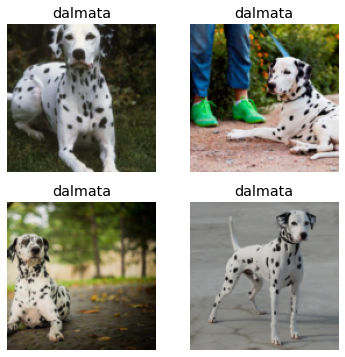

In [ ]:
dls.train.show_batch(max_n=4, nrows=2)

In [ ]:
animales = animales.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animales.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

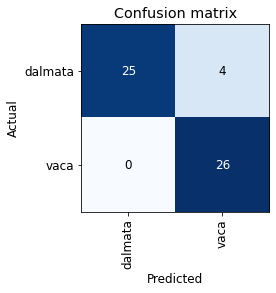

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

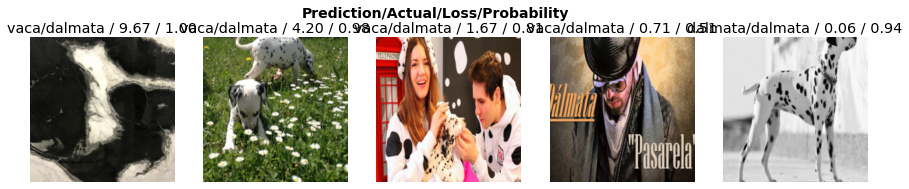

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = ['imagenes/dalmata/00000000.jpg'])
img = PILImage.create(btn_upload.data[-1])

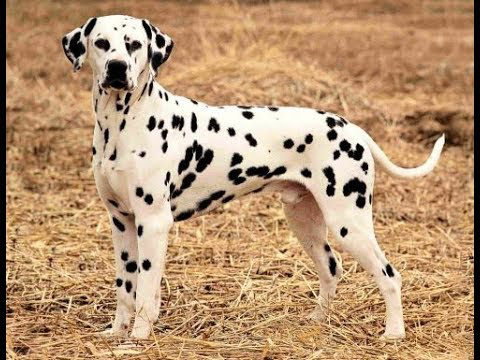

In [ ]:
img

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediccion: {pred}; Probabilidad: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediccion: dalmata; Probabilidad: 0.9984')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
learn.export()
model_path = f'fastai/models/vaca_dalmata'
!mkdir -p /content/drive/My\ Drive/{model_path}
!cp /content/export.pkl /content/drive/My\ Drive/{model_path}
print("DONE! DONE! DONE!")
print(f'Your exported image classifier(export.pkl) is saved in your Google Drive under the folder My Drive/{model_path}/export.pkl')
print("Make sure to end your session (Click on menu Runtime/Factory reset runtime and click 'Yes' on the dialog box to end your session)")
print("before closing this notebook.")

DONE! DONE! DONE!
Your exported image classifier(export.pkl) is saved in your Google Drive under the folder My Drive/fastai/models/vaca_dalmata/export.pkl
Make sure to end your session (Click on menu Runtime/Factory reset runtime and click 'Yes' on the dialog box to end your session)
before closing this notebook.
